In [1]:
#import the dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras import models
from keras import layers

# Define the structure of the model 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# use sigmoid for the last layer as we need a binary output.

In [0]:
# Compile the model, configure the optimizer
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Split the training set for hyperparameter tuning. 
# Here we try to tune the ideal number of epochs to get the best result
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# Training Phase. Record the accuracy and error/loss for tuning later on
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.5057 - acc: 0.7433 - val_loss: 0.3434 - val_acc: 0.8641
Epoch 2/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.2661 - acc: 0.8974 - val_loss: 0.2927 - val_acc: 0.8832
Epoch 3/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1967 - acc: 0.9271 - val_loss: 0.2778 - val_acc: 0.8906
Epoch 4/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1313 - acc: 0.9534 - val_loss: 0.3360 - val_acc: 0.8752
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1062 - acc: 0.9617 - val_loss: 0.4452 - val_acc: 0.8520
Epoch 6/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.0852 - acc: 0.9730 - val_loss: 0.3687 - val_acc: 0.8796
Epoch 7/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.0773 - acc: 0.9797 - val_loss: 0.3770 - 

In [19]:
# get the loss and accuracy from history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

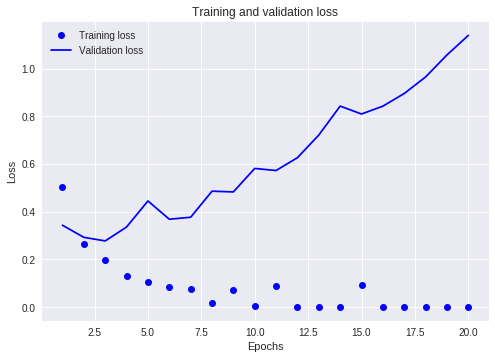

In [20]:
# Plotting the training and validation loss for tuning the number of epochs
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


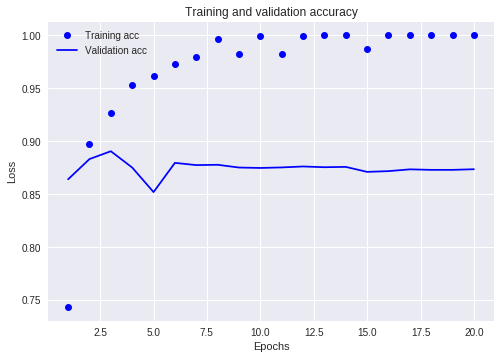

In [21]:
# Plotting the accuracy curves
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
# The ideal number of epochs looks to be 3. So retrain the model using all the
# training examples (all of 25k)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 4s 152us/step - loss: 0.4537 - acc: 0.8012
Epoch 2/3
25000/25000 [==============================] - 3s 135us/step - loss: 0.2511 - acc: 0.9034
Epoch 3/3
25000/25000 [==============================] - 3s 111us/step


In [24]:
# check the final accuracy and loss
results

[0.31047196615219114, 0.87928]

In [25]:
# make prediction on unseen data now - test data
predictions = model.predict(x_test)
predictions = predictions >= 0.5
# change the datatype to float from bool
predictions = np.asarray(predictions).astype('float32')
# convert it to array
predictions = np.reshape(predictions, -1)
# size of test
print(len(y_test))
# size of prediction - should be equal to test 
print(len(predictions))
correct_predictions = np.sum(y_test == predictions)
print(correct_predictions)
print(float(correct_predictions) / len(y_test))

25000
25000
21982
0.87928


In [26]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 110us/step


[0.31047196615219114, 0.87928]